<a href="https://colab.research.google.com/github/2019mohamed/Topic-Modeling/blob/main/LDA_Topic_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.datasets import fetch_20newsgroups
import numpy as np
import pandas as pd

In [7]:
corpus = pd.read_csv('/content/drive/MyDrive/corpus.csv')
corpus.head(10)

,Unnamed: 0,ArticleID,Title,Abstract,text
0,0,34153941,Stable Coordination Variability in Overground ...,Coordination variability (CV) is commonly anal...,stabl coordin variabl overground walk run pref...
1,1,34153942,Weak Hip Strength Increases Dynamic Knee Valgu...,Clinical Scenario: Dynamic knee valgus (DKV) i...,weak hip strength increas dynam knee valgus si...
2,2,34153964,Current and Future Projections of Amyotrophic ...,Various methodologies have been reported to as...,current futur project amyotroph later sclerosi...
3,3,34153968,Disparities between Asian and Non-Asian Thromb...,As outcomes for acute ischemic stroke (AIS) va...,dispar asian nonasian thrombolyz acut ischem s...
4,4,34153978,Maternal Factors Predicting Loss to Follow-Up ...,Because hearing loss in children can result in...,matern factor predict loss followup newborn he...
5,5,34153979,Testing the feasibility and acceptability of a...,"Despite growing numbers in the USA, immigrant ...",test feasibl accept cultur adapt physic activ ...
6,6,34153980,Lupus nephritis and ANCA-associated vasculitis...,Historically the treatment of lupus nephritis ...,lupus nephriti ancaassoci vascul toward precis...
7,7,34153982,Precision medicine in diabetic nephropathy and...,Progressive chronic kidney disease (CKD) in in...,precis medicin diabet nephropathi chronic kidn...
8,8,34153983,Precision medicine in immunoglobulin A nephrop...,Immunoglobulin A nephropathy (IgAN) is the mos...,precis medicin immunoglobulin nephropathi stil...
9,9,34153984,Precision medicine in transplantation and hemo...,"In kidney transplantation, precision medicine ...",precis medicin transplant hemodialysi kidney t...


In [12]:
docs = corpus['text']
docs

0       stabl coordin variabl overground walk run pref...
1       weak hip strength increas dynam knee valgus si...
2       current futur project amyotroph later sclerosi...
3       dispar asian nonasian thrombolyz acut ischem s...
4       matern factor predict loss followup newborn he...
                              ...                        
4994    mind differ diagnosi hospit characterist influ...
4995    ethic die deciph pandemicresult pressur influe...
4996    research adolesc regard indirect effect depres...
4997    preintervent effect communitybas intervent tar...
4998    pharmacist role older adult medic regimen comp...
Name: text, Length: 4999, dtype: object

In [5]:
def plot_top_words(model, feature_names, n_top_words, title):
  '''
   visluation top words for all topics
  '''
  fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
  axes = axes.flatten()
  for topic_idx, topic in enumerate(model.components_):
      top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
      top_features = [feature_names[i] for i in top_features_ind]
      weights = topic[top_features_ind]

      ax = axes[topic_idx]
      ax.barh(top_features, weights, height=0.7)
      ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
      ax.invert_yaxis()
      ax.tick_params(axis="both", which="major", labelsize=20)
      for i in "top right left".split():
          ax.spines[i].set_visible(False)
      fig.suptitle(title, fontsize=40)

  plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
  plt.show()

In [13]:
n_features = 1000
n_top_words = 10

train_corpus = docs.iloc[:3000,]
train_corpus

0       stabl coordin variabl overground walk run pref...
1       weak hip strength increas dynam knee valgus si...
2       current futur project amyotroph later sclerosi...
3       dispar asian nonasian thrombolyz acut ischem s...
4       matern factor predict loss followup newborn he...
                              ...                        
2995    addit indian fauna euryleptida polycladida cot...
2996    updat checklist semiterrestri estuarin crab cr...
2997    first record genus gnathochorisi frster hymeno...
2998    new earthworm record caspian hyrcanian forest ...
2999    descript two new willdwel speci metriaclima ci...
Name: text, Length: 3000, dtype: object

In [14]:
test_corpus = docs.iloc[3000:,]
test_corpus

3000    new semifossori snake genus arrhyton squamata ...
3001    two new speci bimasto oligochaeta lumbricida s...
3002    garra hormuzensi new speci upper kol river dra...
3003    new speci crella pythea topsent crellomima rez...
3004    revis genus lopesiodinia prado diptera odiniid...
                              ...                        
4994    mind differ diagnosi hospit characterist influ...
4995    ethic die deciph pandemicresult pressur influe...
4996    research adolesc regard indirect effect depres...
4997    preintervent effect communitybas intervent tar...
4998    pharmacist role older adult medic regimen comp...
Name: text, Length: 1999, dtype: object

In [19]:
# Use tf (raw term count) features for LDA.
tf_vectorizer = CountVectorizer( max_features=n_features)
tf = tf_vectorizer.fit_transform(train_corpus)

In [20]:
tf.shape

(3000, 1000)

In [21]:
tf.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [26]:
from sklearn import metrics

In [35]:
scores_silhouette_score = []
scores_calinski_harabasz_score = []
scores_davies_bouldin_score = []
ldas = []
components = list(range(5,20))
components

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

##Train LDA
evaluation LDA using clusting (How many topics?) metrics sush as silhouette_score, calinski_harabasz_score and davies_bouldin_score.

In [36]:
for n in components:
  lda = LatentDirichletAllocation(
    n_components=n,
    max_iter=20,
    learning_method="online")
  ldas.append(lda)
  Ps = lda.fit_transform(tf)
  topic_id = np.argmax(Ps , axis = 1)
  scores_silhouette_score.append(metrics.silhouette_score(tf.toarray(), topic_id))
  scores_calinski_harabasz_score.append(metrics.calinski_harabasz_score(tf.toarray(), topic_id))
  scores_davies_bouldin_score.append(metrics.davies_bouldin_score(tf.toarray(), topic_id))


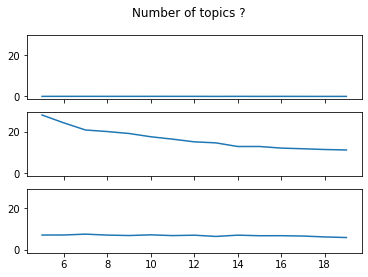

In [37]:
fig, axs = plt.subplots(3, sharex=True, sharey=True)
fig.suptitle('Number of topics ?')
axs[0].plot(components, scores_silhouette_score)
axs[1].plot(components, scores_calinski_harabasz_score)
axs[2].plot(components, scores_davies_bouldin_score)

In [38]:
scores_calinski_harabasz_score = np.array(scores_calinski_harabasz_score)
ideal_index = np.argmax(scores_calinski_harabasz_score)
ideal_lda = ldas[ideal_index]

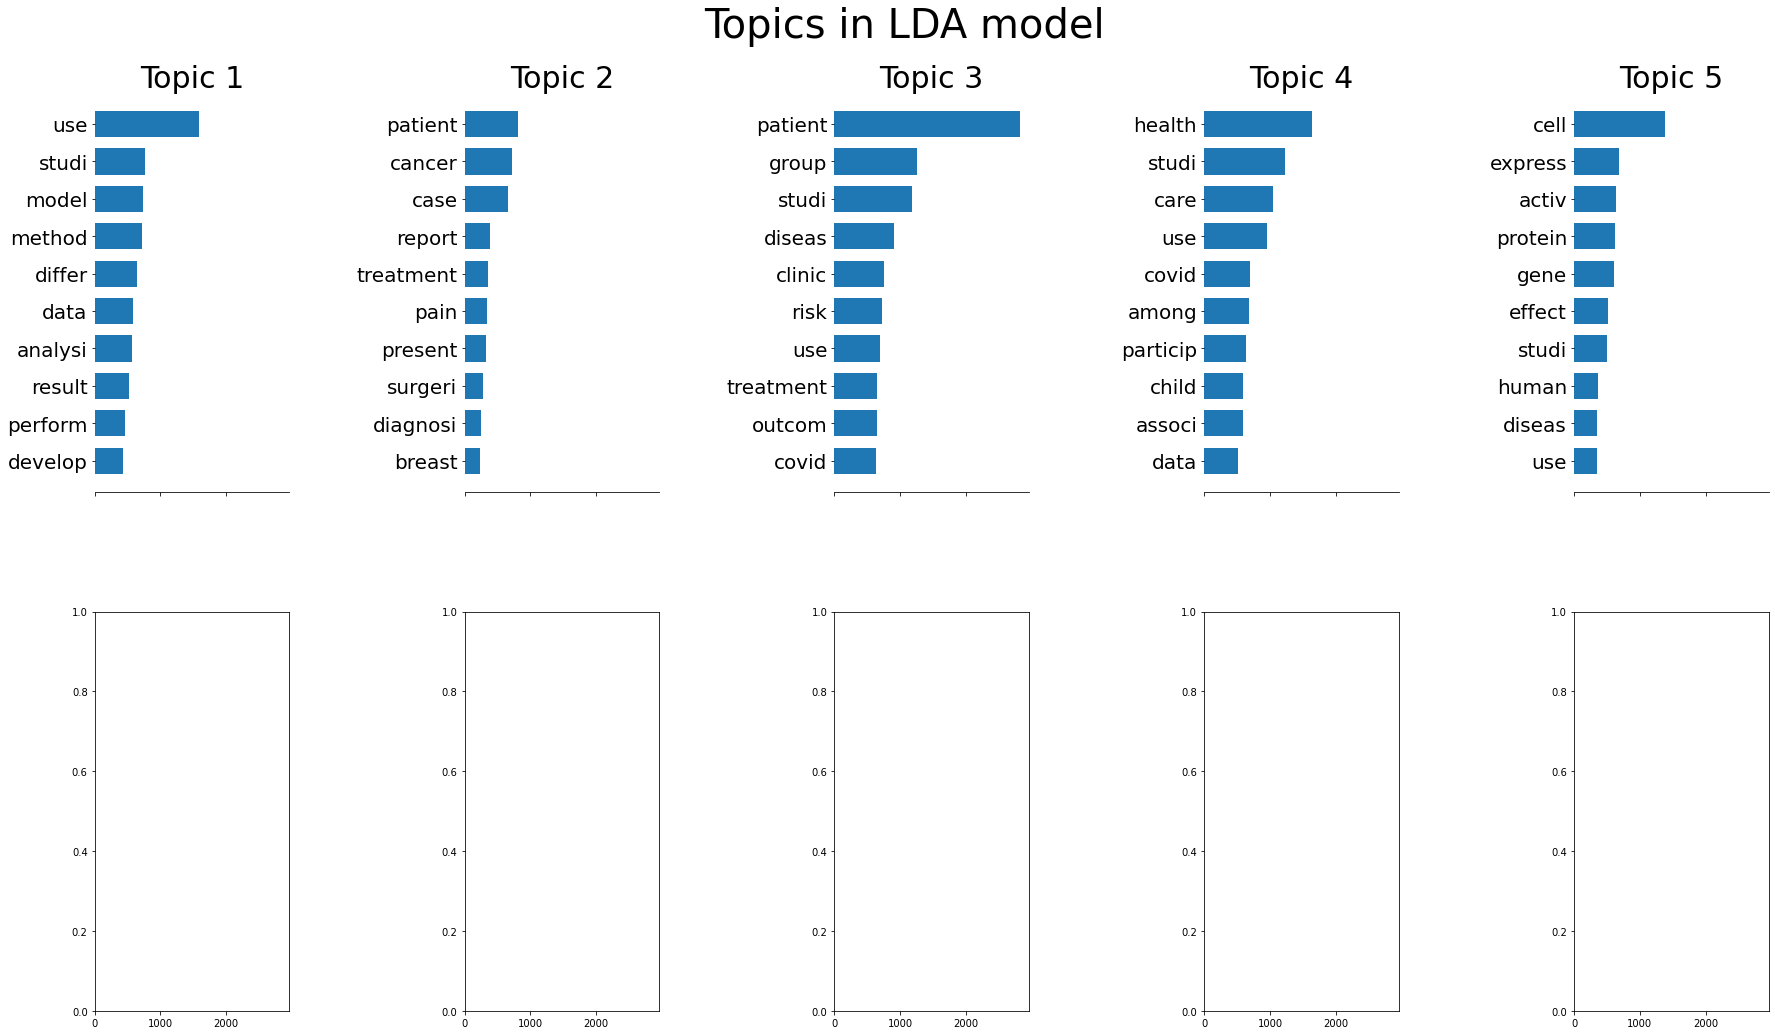

In [39]:
tf_feature_names = tf_vectorizer.get_feature_names_out()
plot_top_words(ideal_lda, tf_feature_names, n_top_words, "Topics in LDA model") # with 5 topics according to scalinski_harabasz_score

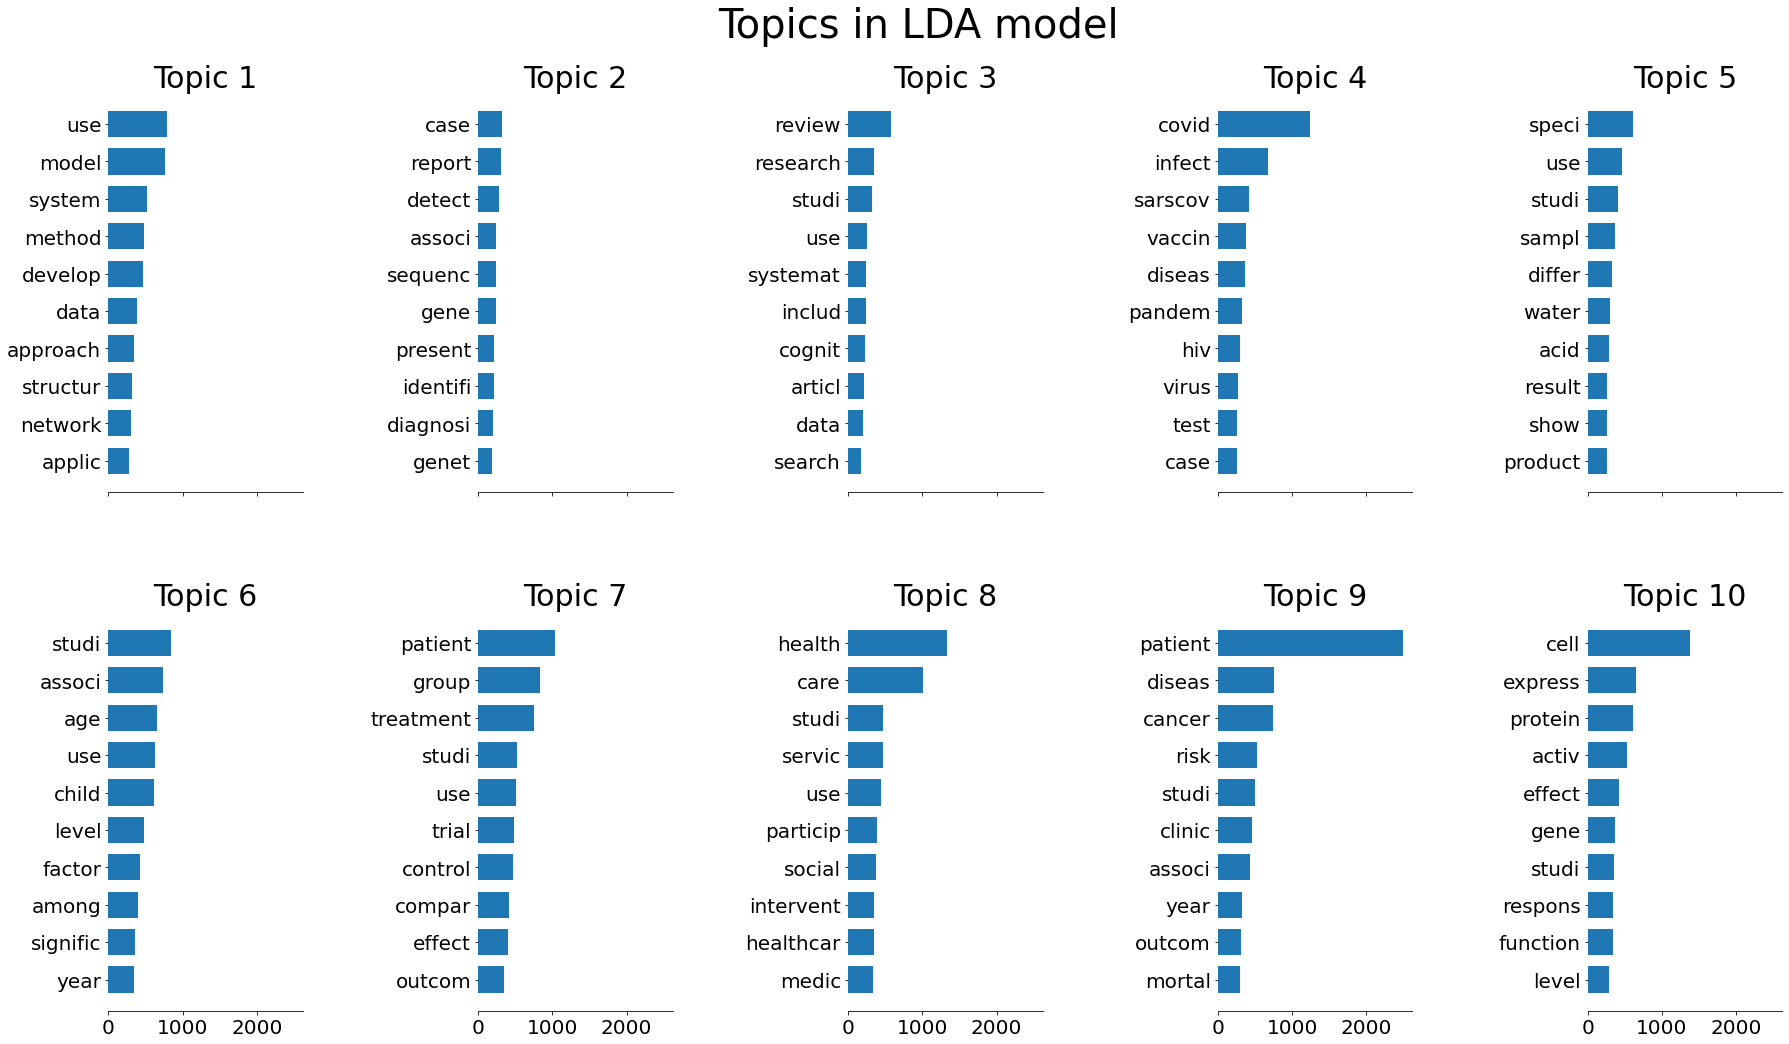

In [41]:
plot_top_words(ldas[5], tf_feature_names, n_top_words, "Topics in LDA model") # with 10 topics

##Testing LDA

In [44]:
tf = tf_vectorizer.transform(test_corpus)
Ps = ideal_lda.transform(tf)
topics_ids = np.argmax(Ps , axis = 1)

In [45]:
Ps

array([[0.42957823, 0.55555566, 0.00494212, 0.0049567 , 0.00496729],
       [0.48350871, 0.49685016, 0.00655635, 0.00652866, 0.00655611],
       [0.27878876, 0.67790782, 0.01441874, 0.0145653 , 0.01431939],
       ...,
       [0.22047462, 0.00245907, 0.00244505, 0.63470802, 0.13991325],
       [0.22687222, 0.00171983, 0.0017435 , 0.76791564, 0.0017488 ],
       [0.0750946 , 0.00292418, 0.00291796, 0.91612633, 0.00293693]])

In [46]:
topics_ids

array([1, 1, 1, ..., 3, 3, 3])